# Importing Libraries

In [342]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [343]:
from matplotlib import interactive 

# Upload Dataset

In [344]:
df = pd.read_csv('Data1.csv')

In [345]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [346]:
df.shape

(614, 13)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [348]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [349]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [350]:
#drop Loan_ID 
df = df.drop(columns=['Loan_ID'])

# Fill Missing Data

In [351]:
#fill numerical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [352]:
#fill categorical columns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [353]:
#df.isnull().sum()

# Split Categories and numerical

In [354]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Visualization

In [355]:
#sns.pairplot(df, hue = 'Loan_Status' , markers=["*", "."] , height=5 ,palette = 'Set2')
#sns.pairplot(df, hue = 'Loan_Status' , palette = 'Set2')

In [356]:
#sns.pairplot(df, hue = 'Loan_Status' ,kind="kde")

In [357]:
df_Corr = df.corr()
df_Corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.037392
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.037392,-0.014477,-0.001665,-0.007738,0.001395,1.000000


# Encodind Categorical Data

In [358]:
df_Encoded = pd.get_dummies(df,drop_first=True)
df_Encoded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1


# EDA

In [359]:
#Categorical visualization
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

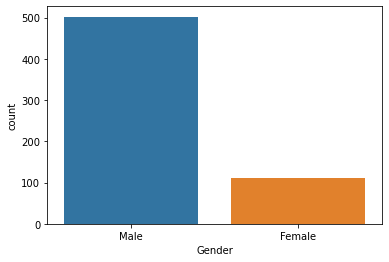

In [360]:
sns.countplot(df['Gender'])

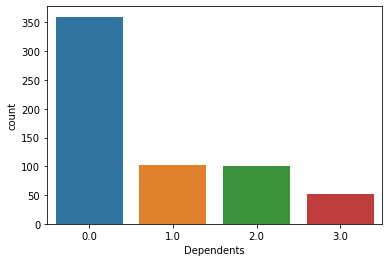

In [361]:
sns.countplot(df['Dependents'])

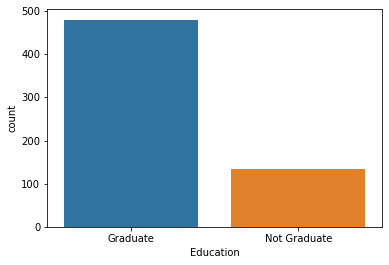

In [362]:
sns.countplot(df['Education'])

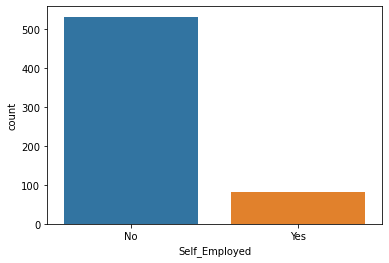

In [363]:
sns.countplot(df['Self_Employed'])

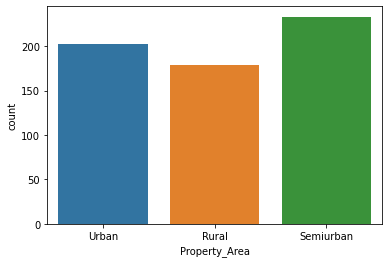

In [364]:
sns.countplot(df['Property_Area'])

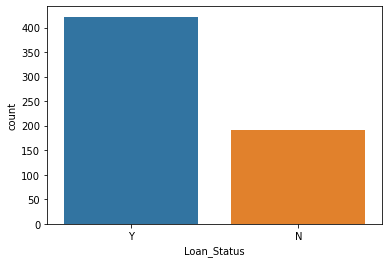

In [365]:
sns.countplot(df['Loan_Status'])

In [366]:
#Numerical visualization
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

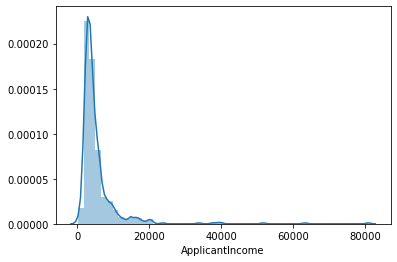

In [367]:
sns.distplot(df['ApplicantIncome'])

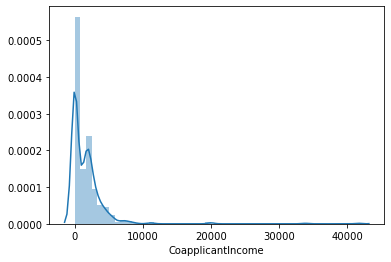

In [368]:
sns.distplot(df['CoapplicantIncome'])

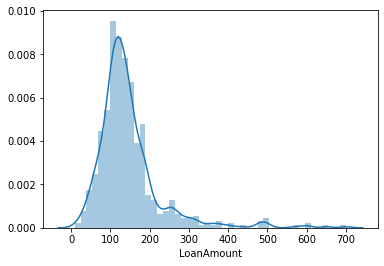

In [369]:
sns.distplot(df['LoanAmount'])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


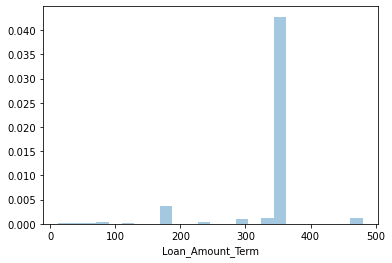

In [370]:
sns.distplot(df['Loan_Amount_Term'])

In [371]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# New Columns

In [372]:
df['Total_Income'] = df['CoapplicantIncome'] + df['ApplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transformation

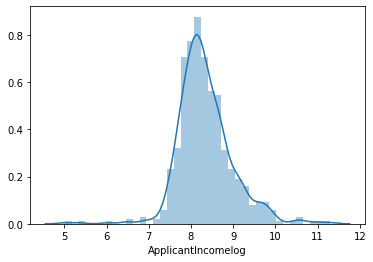

In [373]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomelog'])

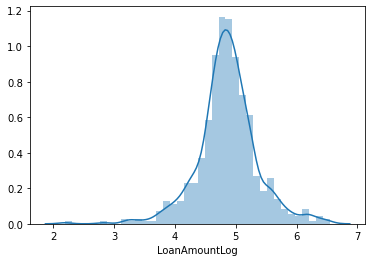

In [374]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

In [375]:
#df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
#sns.distplot(df['CoapplicantIncomeLog'])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


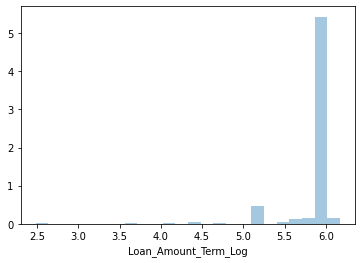

In [376]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

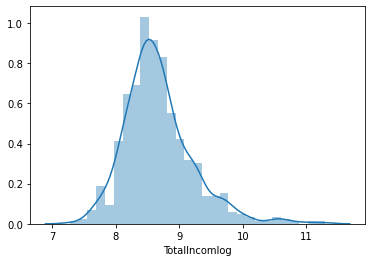

In [377]:
df['TotalIncomlog'] = np.log(df['Total_Income'])
sns.distplot(df['TotalIncomlog'])

# Correlation Matrix

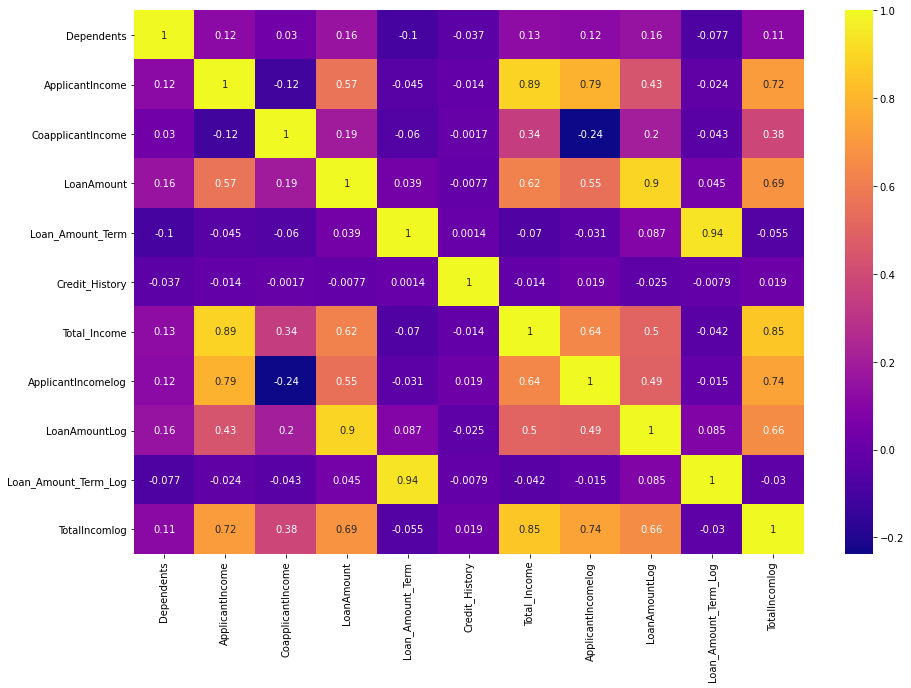

In [378]:
corr = df.corr()
plt.figure(figsize =(15,10))
sns.heatmap(corr , annot=True , cmap='plasma')

### Highly Correlated

In [379]:
cor = dataset3.corr()
cor

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomlog
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.037392,0.125590,0.115816,0.156391,-0.076821,0.112812
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790532,0.434849,-0.024085,0.717829
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237900,0.204179,-0.042941,0.383827
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551556,0.895324,0.044905,0.687552
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030739,0.086531,0.938871,-0.055320
Credit_History,-0.037392,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019169,-0.025248,-0.007860,0.019156
Total_Income,0.125590,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.639953,0.503817,-0.042237,0.852873
ApplicantIncomelog,0.115816,0.790532,-0.237900,0.551556,-0.030739,0.019169,0.639953,1.000000,0.491066,-0.014618,0.740300
LoanAmountLog,0.156391,0.434849,0.204179,0.895324,0.086531,-0.025248,0.503817,0.491066,1.000000,0.084534,0.657507
Loan_Amount_Term_Log,-0.076821,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.042237,-0.014618,0.084534,1.000000,-0.029522


In [380]:
#drop highly correlated
# Create correlation matrix
cor_matrix = dataset3.corr().abs()

# Select upper triangle of correlation matrix
upper = cor_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [381]:
df.shape

(614, 17)

In [382]:
dataset3.shape

(614, 17)

# Label Encoding

In [383]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [384]:
col_label = ['Gender' , 'Married' , 'Education' ,'Self_Employed' , 'Property_Area' , 'Loan_Status' ]

for col in col_label:
    df[col] = le.fit_transform(df[col])

# Choose Best Columns

### Feature Selection

- chi square test
- anova test
- correlation coefficient

### Wrapper Method

- Forward Selection
- Backward Elimination
- Recursive Feature Elimination

### Embeded Method

- Univariate Selection

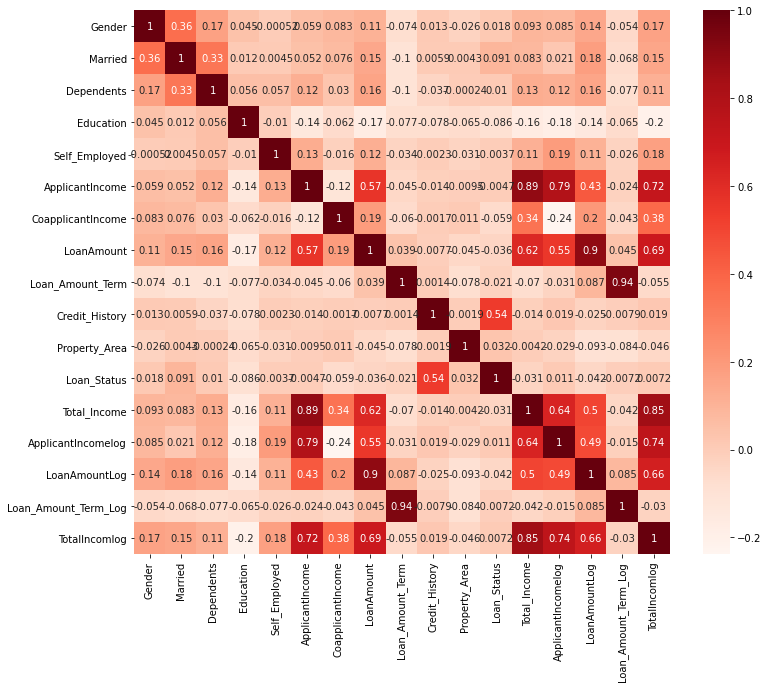

In [387]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [388]:
#Feature Selection - Filter Method 2

#Correlation with output variable
cor_target = abs(cor["Loan_Status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Credit_History    0.540483
Loan_Status       1.000000
Name: Loan_Status, dtype: float64

In [389]:
print(df1[["Credit_History","Loan_Status"]].corr())

                Credit_History  Loan_Status
Credit_History        1.000000     0.540483
Loan_Status           0.540483     1.000000


### Feature selection with correlation and random forest classification

In [390]:
df1 = df.copy()

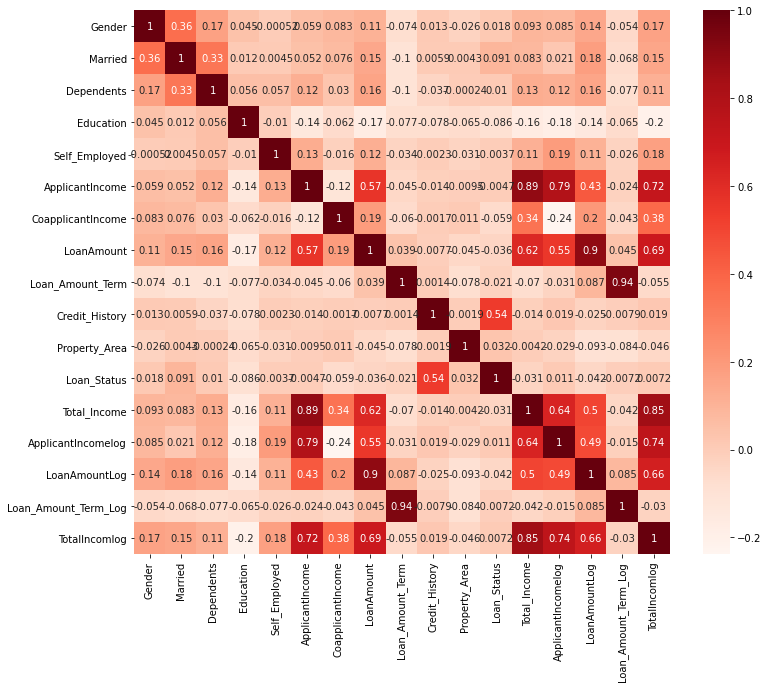

In [391]:
#Feature Selection - Filter Method 1

plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [392]:
#Delete those features who have highly correlated in heat map

Del_cols = ['ApplicantIncome' ,'CoapplicantIncome' ,'Loan_Amount_Term' ,'LoanAmount' ,'Total_Income' ]
df1 = df1.drop(columns=Del_cols , axis=1)

In [393]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomlog
0,1,0,0.0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1.0,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0.0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0.0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0.0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


### Random Forest To see accuracy

In [394]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

X1 = df1.drop(columns=['Loan_Status'] , axis=1 )
y1 = df1['Loan_Status']
x1_train , x1_test ,y1_train , y1_test = train_test_split(X1,y1,test_size = 0.25 , random_state=42)

Accuracy is:  0.8116883116883117


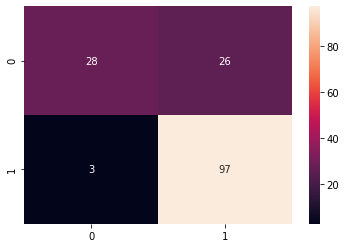

In [395]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x1_train,y1_train)

ac = accuracy_score(y1_test,clf_rf.predict(x1_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y1_test,clf_rf.predict(x1_test))
sns.heatmap(cm,annot=True,fmt="d")

### Univariate feature selection and random forest classification

In [396]:
df2 = df.copy()

In [397]:
X2 = df2.drop(columns=['Loan_Status'] , axis=1 )
y2 = df2['Loan_Status']
x2_train , x2_test ,y2_train , y2_test = train_test_split(X2,y2,test_size = 0.25 , random_state=42)

In [398]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x2_train, y2_train)

In [399]:
print('Score list:', select_feature.scores_)
print('Feature list:', x2_train.columns)

Score list: [4.60829493e-03 1.64203612e+00 1.48331908e+00 1.36134454e+00
 3.82513661e-02 4.26396632e+02 1.20793153e+03 7.38387026e+00
 1.05592212e-02 2.02139670e+01 1.83051183e-01 1.20164728e+03
 1.43321535e-02 1.69564493e-02 1.50695810e-03 2.72093880e-02]
Feature list: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income',
       'ApplicantIncomelog', 'LoanAmountLog', 'Loan_Amount_Term_Log',
       'TotalIncomlog'],
      dtype='object')


Accuracy is:  0.7662337662337663


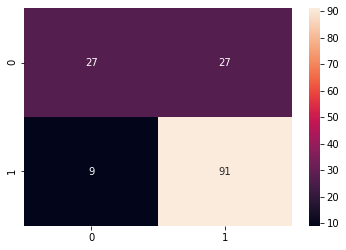

In [400]:
x2_train = select_feature.transform(x2_train)
x2_test = select_feature.transform(x2_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x2_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x2_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x2_test))
sns.heatmap(cm_2,annot=True,fmt="d")

### Recursive feature elimination (RFE) with random forest

In [401]:
df3 = df.copy()

In [402]:
X3 = df3.drop(columns=['Loan_Status'] , axis=1 )
y3 = df3['Loan_Status']
x3_train , x3_test ,y3_train , y3_test = train_test_split(X3,y3,test_size = 0.25 , random_state=42)

In [403]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x3_train, y3_train)

In [404]:
print('Chosen best 5 feature by rfe:',x3_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['ApplicantIncome', 'Credit_History', 'Total_Income', 'LoanAmountLog',
       'TotalIncomlog'],
      dtype='object')


In [405]:
#important 5 features in dataset
Impo_Var = ['ApplicantIncome' ,'Credit_History' , 'Total_Income' , 'LoanAmountLog' ,'TotalIncomlog' ]

### Tree based feature selection and random forest classification

In [406]:
df4 = df.copy()

In [407]:
X4 = df4.drop(columns=['Loan_Status'] , axis=1 )
y4 = df4['Loan_Status']
x4_train , x4_test ,y4_train , y4_test = train_test_split(X4,y4,test_size = 0.25 , random_state=42)

Feature ranking:
1. feature 9 (0.267206)
2. feature 11 (0.100828)
3. feature 15 (0.092302)
4. feature 12 (0.088988)
5. feature 5 (0.085253)
6. feature 7 (0.080663)
7. feature 13 (0.078052)
8. feature 6 (0.050869)
9. feature 10 (0.031019)
10. feature 2 (0.025728)
11. feature 8 (0.024554)
12. feature 14 (0.024530)
13. feature 1 (0.015773)
14. feature 3 (0.013528)
15. feature 0 (0.011292)
16. feature 4 (0.009416)


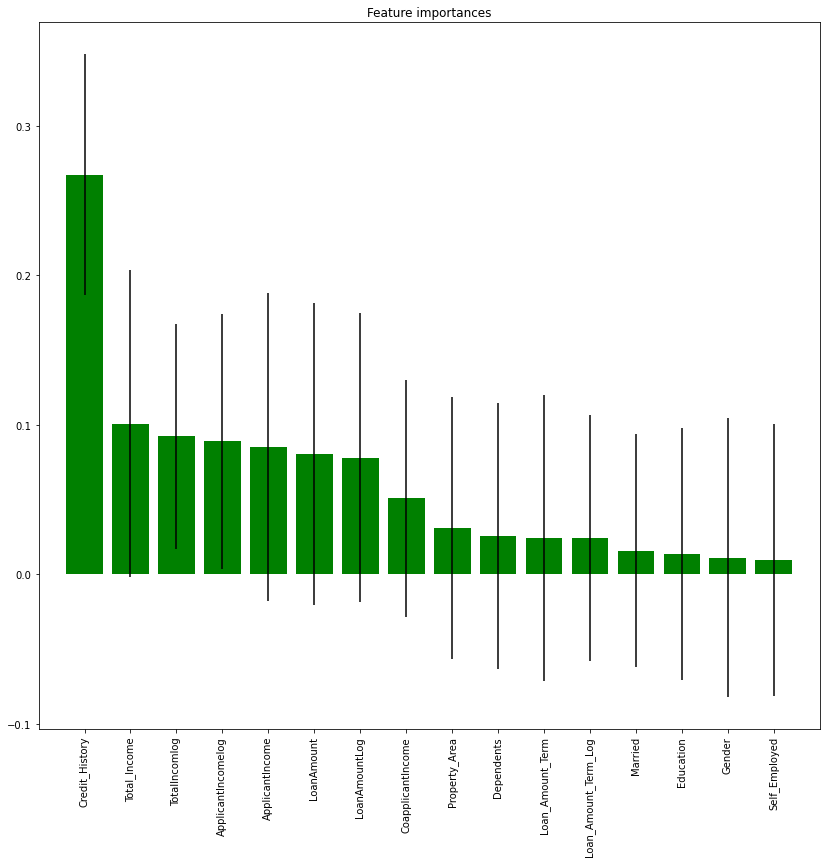

In [408]:
clf_rf_4 = RandomForestClassifier()      
clr_rf_4 = clf_rf_4.fit(x4_train,y4_train)
importances = clr_rf_4.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=1)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x4_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x4_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x4_train.shape[1]), x4_train.columns[indices],rotation=90)
plt.xlim([-1, x4_train.shape[1]])
plt.show()

# Train Test Split

In [409]:
X = df.drop(columns=['Loan_Status'] , axis=1 )
y = df['Loan_Status']

In [410]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state=42)

In [411]:
from sklearn.model_selection import cross_val_score

# Model Training

In [412]:
def calssify(model , x,y):
    x_train , x_test ,y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state=42)
    model.fit(x_train ,y_train)
    print("Accuarcy For Your Model" ,model.score( x_test , y_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)

In [413]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
calssify(model,X,y)

Accuarcy For Your Model 77.27272727272727
Cross Validation For Your Model 79.9693455950953


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### DecisionTreeClassifier

In [414]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
calssify(model,X,y)

Accuarcy For Your Model 72.72727272727273
Cross Validation For Your Model 74.59016393442623


### RandomForestClassifier

In [415]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
calssify(model,X,y)

Accuarcy For Your Model 76.62337662337663
Cross Validation For Your Model 78.17939490870319


### RandomForestClassifier 

In [416]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
calssify(model,X,y)

Accuarcy For Your Model 77.92207792207793
Cross Validation For Your Model 77.85285885645742


### ExtraTreesClassifier

In [417]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = ExtraTreesClassifier()
calssify(model,X,y)

Accuarcy For Your Model 77.27272727272727
Cross Validation For Your Model 77.5276556044249


### Hyperparameter Tunning

In [418]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify(model,X,y)

Accuarcy For Your Model 74.02597402597402
Cross Validation For Your Model 73.28935092629617


In [419]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify(model,X,y)

Accuarcy For Your Model 68.83116883116884
Cross Validation For Your Model 75.40583766493403


# Confusion Matrix

In [420]:
model = RandomForestClassifier()
model.fit(x_train , y_train)

RandomForestClassifier()

In [421]:
from sklearn.metrics import confusion_matrix
y_predict = model.predict(x_test)

co = confusion_matrix(y_test , y_predict)
co

array([[25, 29],
       [ 6, 94]])

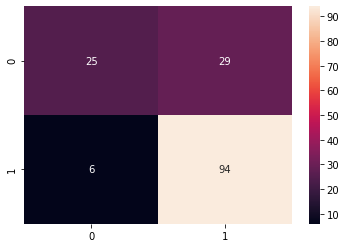

In [422]:
sns.heatmap(co , annot=True)